In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.7 MB/s 
     |████████████████████████████████| 2.0 MB 18.4 MB/s 
     |████████████████████████████████| 113 kB 13.0 MB/s 
     |████████████████████████████████| 1.7 MB 33.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 35.8 MB/s 
     |████████████████████████████████| 167 kB 48.5 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 15.5 MB 35.1 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 261 kB 46.5 MB/s 
     |████████████████████████████████| 1.3 MB 36.6 MB/s 
     |████████████████████████████████| 102 kB 11.1 MB/s 
     |████████████████████████████████| 675 kB 38.9 MB/s 
     |████████████████████████████████| 3.1 MB 35.2 MB/s 
     |█████████████████

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip

In [4]:
import pandas as pd
df = pd.read_csv('hour.csv')
df = df.drop(['casual'],axis=1)
df = df.drop(['registered'],axis=1)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [5]:
#check the shape of data
df.shape

(17379, 15)

In [6]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15641, 15)
Unseen Data For Predictions: (1738, 15)


In [7]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt', session_id=123)

,Description,Value
0,session_id,123
1,Target,cnt
2,Original Data,"(15641, 15)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10948, 38)"


In [8]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.583880e+01,1.644487e+03,4.053080e+01,9.497000e-01,0.4069,0.4112,0.215
et,Extra Trees Regressor,2.588700e+01,1.778305e+03,4.209970e+01,9.457000e-01,0.3438,0.3162,4.354
rf,Random Forest Regressor,2.599040e+01,1.790111e+03,4.227970e+01,9.453000e-01,0.3470,0.3152,4.858
dt,Decision Tree Regressor,3.486150e+01,3.520563e+03,5.929650e+01,8.923000e-01,0.4495,0.3759,0.107
gbr,Gradient Boosting Regressor,4.753900e+01,4.808696e+03,6.929580e+01,8.527000e-01,0.6785,0.9366,1.204
ada,AdaBoost Regressor,8.989650e+01,1.196023e+04,1.093319e+02,6.344000e-01,1.1011,2.9645,0.776
ridge,Ridge Regression,1.043979e+02,1.950242e+04,1.396213e+02,4.039000e-01,1.2094,3.3896,0.029
br,Bayesian Ridge,1.043923e+02,1.950367e+04,1.396261e+02,4.039000e-01,1.2103,3.3848,0.049
lr,Linear Regression,1.044745e+02,1.951196e+04,1.396559e+02,4.036000e-01,1.2116,3.3931,0.368
lasso,Lasso Regression,1.051436e+02,1.987357e+04,1.409454e+02,3.926000e-01,1.2105,3.3918,0.048


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [10]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,88.4299,11427.5716,106.8998,0.6486,1.1760,3.6112
1,86.4751,11255.0986,106.0900,0.6334,1.0360,2.5518
2,89.7476,12439.5916,111.5329,0.6393,1.0270,2.4155
3,94.1214,12655.8984,112.4984,0.5961,1.0947,3.0194
4,92.7313,12174.8891,110.3399,0.6421,1.2524,4.2862
5,88.4220,12035.8084,109.7078,0.6491,1.0208,2.2868
6,84.7100,10838.6003,104.1086,0.6489,0.9651,1.9985
7,93.2581,12478.1957,111.7058,0.6165,1.2002,3.6370
8,90.4424,12290.9581,110.8646,0.6323,1.0497,2.4634
9,90.6271,12005.7198,109.5706,0.6373,1.1892,3.3746


In [13]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [11]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.6472,1639.1577,40.4865,0.9496,0.4227,0.4490
1,26.2704,1681.9887,41.0121,0.9452,0.4507,0.4577
2,25.3021,1559.9087,39.4957,0.9548,0.4183,0.4318
3,26.6782,1854.7524,43.0668,0.9408,0.3814,0.3980
4,24.9430,1631.9576,40.3975,0.9520,0.4202,0.4601
5,27.0927,1800.8857,42.4368,0.9475,0.4060,0.4031
6,25.9633,1478.2710,38.4483,0.9521,0.4072,0.3739
7,25.2464,1562.5022,39.5285,0.9520,0.4059,0.4118
8,25.9471,1577.9437,39.7233,0.9528,0.3811,0.3729
9,25.2980,1657.5054,40.7125,0.9499,0.3750,0.3541


In [12]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,33.8301,3573.8813,59.7819,0.8901,0.4707,0.3921
1,34.3900,3469.3635,58.9013,0.8870,0.4667,0.3755
2,35.2447,3391.2374,58.2343,0.9017,0.4606,0.3998
3,35.4785,3755.6283,61.2832,0.8801,0.4618,0.4164
4,34.3105,3814.9680,61.7654,0.8879,0.4518,0.3929
5,37.4183,3850.8922,62.0556,0.8877,0.4542,0.3848
6,34.4804,3218.4639,56.7315,0.8957,0.4269,0.3369
7,35.1479,3470.5744,58.9116,0.8933,0.4273,0.3453
8,33.8684,3030.2523,55.0477,0.9093,0.4386,0.3523
9,34.4461,3630.3656,60.2525,0.8903,0.4369,0.3630


In [14]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,76.0144,9629.7451,98.1313,0.7038,0.9479,2.0390
1,78.4944,10156.4895,100.7794,0.6692,0.9637,2.1041
2,82.0896,10699.2718,103.4373,0.6898,1.0240,2.4865
3,82.5344,10395.3057,101.9574,0.6682,1.0322,2.6252
4,80.4108,10078.3404,100.3909,0.7037,1.0935,2.9002
5,77.9655,10027.3479,100.1366,0.7077,0.8925,1.6868
6,82.4878,10782.3076,103.8379,0.6507,0.9602,2.0988
7,77.8934,10422.6340,102.0913,0.6797,0.8887,1.7353
8,77.9684,9830.8774,99.1508,0.7059,0.9452,2.0891
9,80.7442,10230.0103,101.1435,0.6910,1.0238,2.3783


In [15]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=220, random_state=123)


In [16]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [17]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23.1297,1406.2059,37.4994,0.9568,0.4091,0.3668
1,22.8089,1298.8310,36.0393,0.9577,0.3911,0.3697
2,22.9595,1344.7678,36.6711,0.9610,0.3598,0.3347
3,23.5837,1485.1209,38.5373,0.9526,0.3597,0.3463
4,22.6586,1430.2095,37.8181,0.9580,0.3776,0.3962
5,25.2820,1678.4900,40.9694,0.9511,0.3839,0.3360
6,22.7791,1247.9798,35.3268,0.9596,0.3578,0.3148
7,22.4041,1403.7745,37.4670,0.9569,0.3363,0.3008
8,23.1740,1361.6704,36.9008,0.9593,0.3449,0.2927
9,23.1652,1411.3047,37.5673,0.9574,0.3522,0.2855


In [18]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [19]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38.1625,4045.9066,63.6074,0.8756,0.4626,0.4588
1,37.5340,3804.4652,61.6803,0.8761,0.4334,0.4084
2,37.3216,3697.2025,60.8046,0.8928,0.4266,0.4025
3,39.7449,4404.3652,66.3654,0.8594,0.4494,0.4383
4,35.0298,3570.7233,59.7555,0.8950,0.4132,0.3910
5,36.1557,3350.6191,57.8845,0.9023,0.4116,0.3836
6,35.1017,3121.2753,55.8684,0.8989,0.3772,0.3389
7,35.6701,3466.2178,58.8746,0.8935,0.3894,0.3405
8,36.3864,3293.2705,57.3870,0.9015,0.3869,0.3482
9,32.7962,2987.2147,54.6554,0.9098,0.3877,0.3455


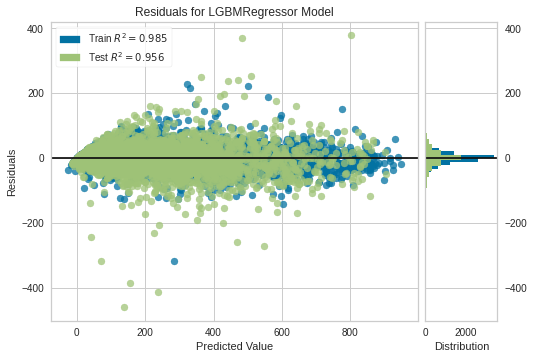

In [20]:
plot_model(tuned_lightgbm)

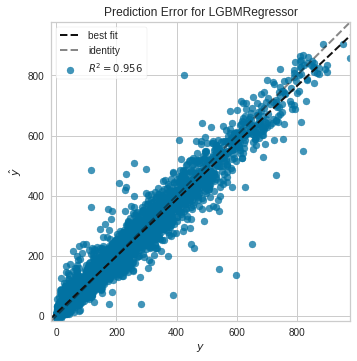

In [21]:
plot_model(tuned_lightgbm, plot = 'error')

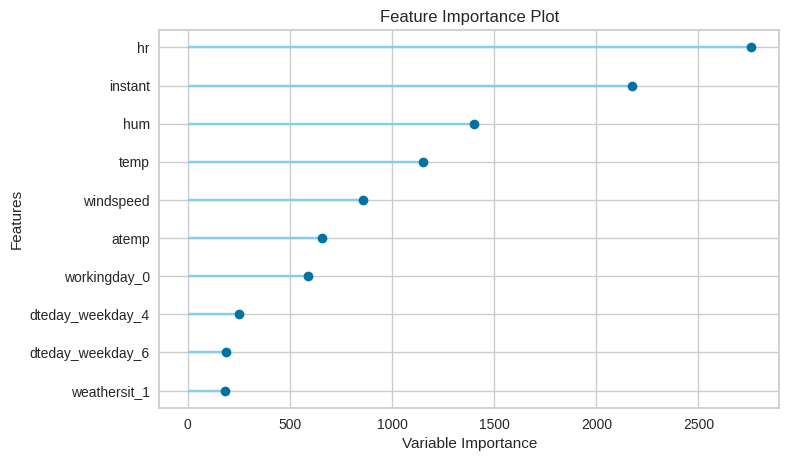

In [22]:
plot_model(tuned_lightgbm, plot='feature')

In [25]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [27]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [28]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,15.5668,590.6023,24.3023,0.9818,0.3231,0.2715


In [29]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,18.792744
1,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,-3.682209
2,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,36.667881
3,13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,107.735600
4,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,40.892389


In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.9622

In [32]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [33]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [35]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [36]:
new_prediction.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,18.792744
1,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,-3.682209
2,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,36.667881
3,13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,107.735600
4,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,40.892389


In [38]:
from pycaret.utils import check_metric
check_metric(new_prediction.cnt, new_prediction.Label, 'R2')

0.9622